### SVM - (Linear Kernel)

In [13]:
# Importing required libraries
from datetime import datetime
import pandas as pd
import numpy as np
import os

import seaborn as sns 
%matplotlib inline

from sklearn import svm
import scikitplot as skplt
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [4]:
# Reading training dataset
userhome = os.path.expanduser('~')
path = '/Documents/'
X_train = pd.read_csv(userhome + path + 'X_train_v2.csv')
Y_train = pd.read_csv(userhome + path + 'Y_train_v2.csv',header=None )

In [5]:

Y_train = Y_train.iloc[:,0]

In [6]:
Y_train.shape

(39321,)

In [7]:
start = datetime.now()
clf = svm.SVC(kernel='linear',C=100,probability=True)
acc = np.mean(cross_val_score(clf, X_train, Y_train, cv=5))
clf.fit(X_train,Y_train)
#print(c)
print('The accuracy of the svm classifier on training data is {:.2f} '.format(clf.score(X_train, Y_train)))
print("This took ", datetime.now() - start)

The accuracy of the svm classifier on training data is 0.96 
This took  0:24:49.537780


In [8]:
# Accuracy of training data for C=100
print("Mean Accuracy on training data : %0.2f (+/- %0.2f)" % (acc.mean(), acc.std() * 2))


Mean Accuracy on training data : 0.95 (+/- 0.00)


In [14]:
#Reading test files
userhome = os.path.expanduser('~')
path = '/Documents/'
X_test = pd.read_csv(userhome + path + 'X_test_v2.csv')
Y_test = pd.read_csv(userhome + path + 'Y_test_v2.csv',header=None )

In [15]:
X_test.head()

,year_2014,year_2015,item_category_Accessories,item_category_Battery,item_category_Books,item_category_Cinema,item_category_Game Consoles,item_category_Games,item_category_Gifts,item_category_Music,item_category_Office,item_category_Official,item_category_Programs,Item Type_Electronics,item_price_s,item_cnt_month_s,Sales_vol_s
0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0.126743,-0.064139,-0.000513
1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0.126743,-0.064139,-0.000513
2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,-0.408436,-0.064139,-0.100928
3,0,0,1,0,0,0,0,0,0,0,0,0,0,1,-0.178637,-0.064139,-0.057811
4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,-0.216810,-0.064139,-0.064973


In [16]:

Y_test = Y_test.iloc[:,0]

In [17]:
#Predicting class labels
Y_pred = clf.predict(X_test)

In [18]:
#Predicting class probabilities
Y_pred_prob = clf.predict_proba(X_test)

[[1751  888]
 [ 604 6937]]


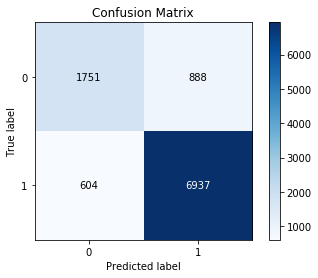

In [19]:
#Preparing confusion matrix of test data
confusion_mat = confusion_matrix(Y_test,Y_pred)
print(confusion_mat)

skplt.metrics.plot_confusion_matrix(Y_test, Y_pred, normalize=False)

In [20]:
#Classification Report of the test data
print(classification_report(Y_test,Y_pred))

             precision    recall  f1-score   support

          0       0.74      0.66      0.70      2639
          1       0.89      0.92      0.90      7541

avg / total       0.85      0.85      0.85     10180



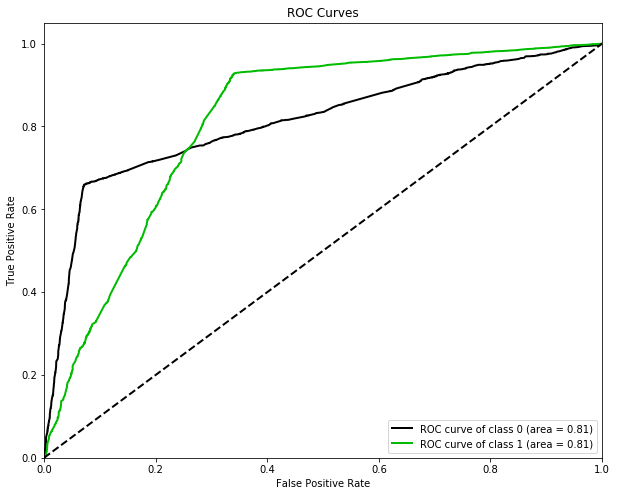

In [21]:
# Another package which helps in creating ROc curve
skplt.metrics.plot_roc(Y_test, Y_pred_prob,figsize=(10,8),plot_macro=False,plot_micro=False)

In [22]:
#Accuracy of the model
print(accuracy_score(Y_test,Y_pred))

0.853438113949
